In [1]:
!pip install numpy matplotlib

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    """Compute sigmoid values for each sets of scores in x"""
    return 1 / (1 + np.exp(-z))

In [3]:
def softmax(x):
    """Compute softmax values for each sets of scores in x"""
    return np.exp(x) / np.sum(np.exp(x), axis=1) 

In [4]:
def forward_propagation(x, w1, w2, w3, b1, b2, b3):
   """ 
    Computes the forward propagation operation for the 3-layered 
    neural network and returns the output at the 2 hidden layers 
    and the output layer
   """
   net_h1 = np.dot(x, w1) + b1 # net output at the first hidden layer
   out_h1 = sigmoid(net_h1) # applying the sigmoid activation to the first hidden layer net output
   net_h2 = np.dot(out_h1, w2) + b2 # net output at the second hidden layer
   out_h2 = sigmoid(net_h2) # applying the sigmoid activation to the second hidden layer net output
   net_y = np.dot(out_h2, w3) + b3 # net output of the output layer
   out_y = softmax(net_y) # applying the softmax activation to the net output of output layer
   return out_h1, out_h2, out_y

In [5]:
def backpropagation(y, out_y, out_h2, out_h1, w3, w2, x):
    """ 
    Computes the backpropagation operation for the 
    3-layered neural network and returns the gradients
    of weights and biases
    """
    # Back propagating error from output to second hidden layer
    l3_error = out_y - y # Calculating error at layer 3
    dW3 = np.dot(out_h2.T, l3_error) # Change in weights at layer 3
    db3 = np.sum(l3_error, axis = 0, keepdims=True) # Change in bias at layer 3

    # Back propagating error from second hidden layer to first hidden layer
    dh2 = np.dot(w3, l3_error) 
    l2_error = np.multiply(dh2.T, out_h2 * (1 - out_h2)) # Calculating error at layer 2
    dW2 = np.dot(out_h1.T, l2_error) # Change in weights at layer 2
    db2 = np.sum(l2_error, axis = 0, keepdims=True) # Change in bias at layer 2

    # Back propagating error from first hidden layer to input layer
    dh1 = np.dot(w2, l2_error.T)
    l1_error = np.multiply(dh1.T, out_h1 * (1 - out_h1)) # Calculating error at layer 1
    dW1 = np.dot(x.T, l1_error) # Change in weights at layer 1
    db1 = np.sum(l1_error, axis=0, keepdims=True) # Change in bias at layer 1

    return dW1, dW2, dW3, db1, db2, db3 

In [6]:
def update_parameters(w1, dW1, b1, db1, w2, dW2, b2, db2, w3, dW3, b3, db3, learning_rate):
    """Update parameters after the gradient descent operation"""
    w1 = w1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    w3 = w3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    return w1, b1, w2, b2, w3, b3


In [11]:
def calculate_error(y, y_predicted):
    """Calculate the cross entropy losss"""
    loss = np.sum(- y * np.log(y_predicted) - (1 - y) * np.log(1 - y_predicted))
    return loss

In [14]:
def train(x, y, w1, w2, w3, b1, b2, b3, epochs, learning_rate):
    """Train the 3 layered neural network"""
    losses = np.zeros((epochs, 1))

    for i in range(epochs):
      
        out_h1, out_h2, out_y = forward_propagation(x, w1, w2, w3, b1, b2, b3)
        losses [i, 0] = calculate_error(y, out_y)
        dW1, dW2, dW3, db1, db2, db3 = backpropagation(y, out_y, out_h2, out_h1, w3, w2, x)
        w1, b1, w2, b2, w3, b3 = update_parameters(w1, dW1, b1, db1, w2, dW2, b2, db2, w3, dW3, b3, db3, learning_rate)

    return w1, b1, w2, b2, w3, b3, losses

In [19]:
# Creating data set   
# A 
A = [0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1] 
   
# B 
B =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0] 
# C 
C =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 1, 1, 1, 0] 
  
# Creating labels 
y =[[1, 0, 0], 
   [0, 1, 0], 
   [0, 0, 1]] 

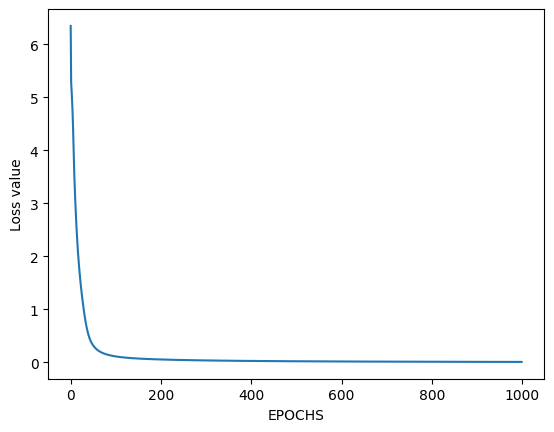

In [20]:
# converting data and labels into numpy array 
x = np.array([a, b, c]) 
# Labels are also converted into NumPy array 
y = np.array(y) 

np.random.seed(42) # seed function to generate the same random value
n_x = 30 # number of nodes in the input layer
n_h1 = 5 # number of nodes in the first hidden layer
n_h2 = 4 # number of nodes in the second hidden layer
n_y = 3 # number of nodes in the output layer
w1 = np.random.randn(n_x, n_h1) # weights of the first hidden layer
w2 = np.random.randn(n_h1, n_h2) # weights of the second hidden layer
w3 = np.random.randn(n_h2, n_y) # weights of the output layer
b1 = np.zeros((1, n_h1)) # bias of the first hidden layer
b2 = np.zeros((1, n_h2)) # bias of the second hidden layer
b3 = np.zeros((1, n_y)) # bias of the output layer
epochs = 1000
learning_rate = 0.5
# Train the neural network
w1, b1, w2, b2, w3, b3, losses = train(x, y, w1, w2, w3, b1, b2, b3, epochs, learning_rate)
# Evaluating the performance 
plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 

In [24]:
A = x[0] # pixel values for letter A
B = x[1] # pixel values for letter B
C = x[2] # pixel values for letter C

def predict(letter, x):
    """Computes predictions on the trained weights and bias"""
    out_h1, out_h2, out_y = forward_propagation(letter, w1, w2, w3, b1, b2, b3)
    print("softmax output:", out_y)
    prediction = np.where(out_y == np.amax(out_y)) # returns the maximum value of array
    print("Highest value of index:", prediction[1][0]) 
    # plot the predicted label
    plt.xlabel("Predicted label") 
    plt.imshow(x[prediction[1][0]].reshape(5, 6)) 
    plt.show()

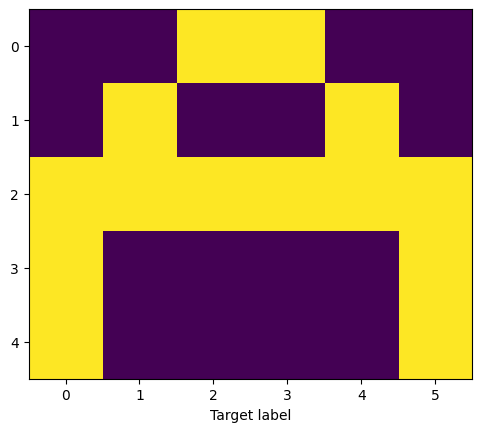

softmax output: [[9.98745200e-01 1.21546937e-03 3.93308569e-05]]
Highest value of index: 0


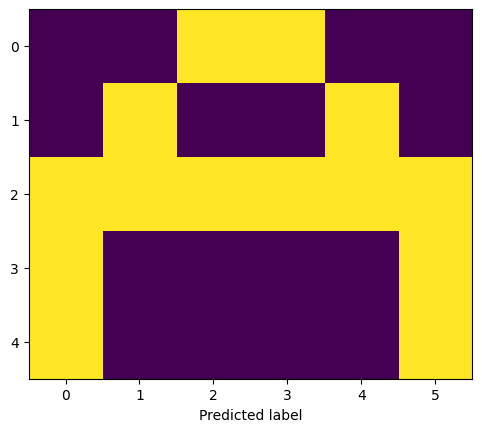

In [25]:
letter = A
# printing the target label
plt.imshow(letter.reshape(5, 6)) 
plt.xlabel("Target label") 
plt.show() 
predict(letter, x)   

predict function:

The function takes in the pixel value of a letter and training data x:

It calls the forward_propagation function which returns the output at the hidden layers out_h1, and out_h2 respectively and the output layer out_y.

The output value shows the probability of a letter belonging to class A, B, or C.

It finds the index of the maximum value of array out_y (to get the predicted class). This index is searched in training data x to look for the corresponding label.

The predicted label is reshaped in 5 rows and 6 columns to print the letter.